Refer to the [Wikipedia article](https://en.wikipedia.org/wiki/Self-avoiding_walk) on self-avoiding walks for a good primer on the subject. [Bauerschmidt et al. (2012)](https://www.ihes.fr/~duminil/publi/saw_lecture_notes.pdf) give an extremely thorough description of known qualities of self-avoiding random walks and their connections to other areas of mathematics. Here are links to some other resources I found informative:
 - MathOverflow
   - https://mathoverflow.net/questions/158811/wander-distance-of-self-avoiding-walk-that-backs-out-of-culs-de-sac
   - https://mathoverflow.net/questions/52813/self-avoiding-walk-enumerations
   - https://mathoverflow.net/questions/41543/how-to-characterize-a-self-avoiding-
   - https://mathoverflow.net/questions/54144/self-avoiding-walk-pair-correlation
   - https://mathoverflow.net/questions/23583/self-avoidance-time-of-random-walk
   - https://mathoverflow.net/questions/181340/square-filling-self-avoiding-walk
 
Some exhaustive results by numerical simulation are available here:
 - https://secure.math.ubc.ca/~slade/lacecounts/index.html
 - https://secure.math.ubc.ca/~slade/se_tables.pdf
 
Here are some other academic results on the topic:
 - https://secure.math.ubc.ca/~slade/se_tables.pdf
 - https://www.sciencedirect.com/science/article/abs/pii/0032386185900084?via%3Dihub
 - https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.2993
 - https://arxiv.org/abs/1408.6714
 - https://www.combinatorics.org/ojs/index.php/eljc/article/view/v21i4p7
 
Other interesting simulations/related information:
 - https://mathoverflow.net/questions/88659/traversing-the-infinite-square-grid
 - https://mathoverflow.net/questions/306794/counting-hamiltonian-cycles-in-n-times-n-square-grid
 - https://iopscience.iop.org/article/10.1088/0305-4470/38/42/001
 - https://mathoverflow.net/questions/67192/exactly-simulating-a-random-walk-from-infinity
 - http://users.cecs.anu.edu.au/~bdm/papers/plantri-full.pdf
 - https://oeis.org/A145157
 - http://www.njohnston.ca/2009/05/on-maximal-self-avoiding-walks/
 - https://datagenetics.com/blog/december22018/index.html
 
Some search terms in case you wish to explore further:
 - (Self-avoiding) random walks (SAWs)
 - Lattice theory
 - Space-filling curve
 - Combinatorics
 - Hamiltonian path (also see Hamiltonian cycle, bent Hamiltonian path)

Other notes:
 - "Greek-key tours" also came up in a handful of online blog posts (linked above) but I was unable to find any relevant information in the literature; in case you want to look, it seems to be related to chess, in the same sense as a Knight's Tour. It also appears in the context of [protein folding](https://en.wikipedia.org/wiki/Beta_sheet#Greek_key_motif) (a surprisingly connected subject).
 - There are quite a few thorough but (unfortunately) isolated resources about this niche of geometry/graph theory on the web; there appears to be a standard nomenclature and some established methodology for these problems but very limited resources on specific (and modern - most of what I could find is at least a few years old) implementations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import itertools
import random

In [3]:
dimensions = 2
D = dimensions
z = 10

start = [0, 0]
choices = []

for n in range(dimensions):
    for y in [-1, 1]:
        delta = np.zeros(dimensions).astype(np.int)
        delta[n] = y
        choices.append(delta)
choices = np.stack(choices)

print(choices)

[[-1  0]
 [ 1  0]
 [ 0 -1]
 [ 0  1]]


In [4]:
steps = []
@nb.njit
def valid_moves(g, m, q):
#     filtered = list(filter(lambda c: (0<=pos+c).all() and (pos+c<z).all() and grid[tuple(pos+c)] == 0, m))
    filtered = []
    for i in m:
#         print(pos, m)
        p = q+i
#         if (0<=p).all() and (p<z).all() and g[p[0], p[1]] == 0:
        if (0<=p).all():
            if (p<z).all():
                if g[p[0], p[1]] == 0:
#                     print(p, g[p[0], p[1]], (p<z).all(), z)
                    filtered.append(i)
    return filtered

In [5]:
@nb.jit(nopython=True)
def bound(x, a, b):
    if x >= b:
        x = b-1
    elif x < a:
        x = a
    return x

@nb.njit
def clip(x, a, b):
    for i in range(x.shape[0]):
        x[i] = bound(x[i], a, b)
    return x

In [134]:
@nb.njit#(parallel=True)
def simulate(z, m=1, backtrack=True, randomize=True):
    for x in range(1):
        pos = np.array([0, 0])
#         grid = np.zeros([z] * D)
        grid = np.zeros((z, z), dtype=np.int64)
#         walks = []
#         steps = []
#         steps.append(pos)

#         steps = np.zeros((z**2, 2))
#         steps[0] = pos
        level = 0 # ?
#         TODO: randomize initial branches

        if randomize:
#             np.random.shuffle(choices)
            branches = np.random.randint(0, 3, (z**2,))
        else:
            branches = np.zeros((z**2,), dtype=np.int64)
        
#         Loop through (n^2)*m steps, where n is the width of the grid and m is a coefficient
        for t in range(z**2*m):
    #         print(0<pos+delta[0]<z)
    #         print(grid[tuple(pos+delta[0])])
            possible = valid_moves(grid, choices, pos)
#             print(possible)
            

#             if branches[level] > len(possible):
#                 branches[level] = len(possible) - 1
    
#             B = branches[level] < len(possible)
#             B = branches[level] < len(choices)
            B = True
#             print(possible)
            
            grid[pos[0], pos[1]] = level+1#+(z**2//4)
            if len(possible) > 0 and B:
#                 delta = random.choice(possible)
#                 delta = np.random.choice(possible)
#                 np.random.shuffle(possible)
#                 index = np.random.randint(0, len(possible))
#                 branches[level] = index
#                 delta = possible[index]

#                 if randomize:
#                     random.shuffle(possible)

                index = branches[level]
                if index >= len(possible):
                    index %= len(possible)
#                 print(index)
                delta = possible[index]
                
#                 grid[tuple(pos)] = 1
#                 print(pos[0])

                
#                 steps.append(delta)
                pos += delta
#                 steps.append(delta)
#                 steps[l] = delta

#                 pos = np.clip(pos, 0, z-1)

                pos = clip(pos, 0, z)

#                 Move to the next "level" below the current one
#                 Only increase the step count if there are still spaces to move to
                if np.count_nonzero(grid) <= z**2-1 and level < z**2-1:
                    level += 1
#                     if randomize:
#                         branches[level] = np.random.randint(0, 4)
#                     else:
                    if not randomize:
                        branches[level] = 0
            

            elif np.count_nonzero(grid) < z**2:
#                 lengths.append(t)
#                 walks.append(grid)
                if backtrack:
                    # TODO: prevent reselection of "stuck" path
            
#                     Reset value of current position and checked sub-branch
                    grid[pos[0], pos[1]] = 0
#                     if not randomize:
                    branches[level] = 0
                    
                    pos -= delta
                    pos = clip(pos, 0, z)

#                     steps.pop()
                    level -= 1
                    if level < 0:
                        level = 0
#                     print(f'Backtracking to level {level} (position: {pos})')
#                     print(level)
                    branches[level] += 1
                else:
                    break
                
        #                 End simulation early if a "perfect" path which covers the entire grid is found
            if np.count_nonzero(grid) >= z**2:
                break
#         else:
#         walks.append(grid)
    return grid

(-0.5, 7.5, 7.5, -0.5)

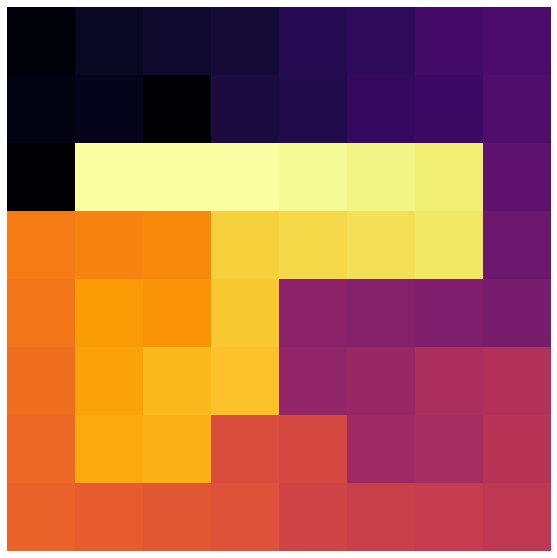

In [187]:
# Store the best discovered path (i.e., the one that covers the most cells in the grid)
best = None
# Track walks/paths and their lengths
lengths = []
walks = []
# Run multiple simulations
for i in range(20000):
    G = simulate(8, 4, True, True)
#     if best:
#         print(best.max())
#     lengths.append(G.max())
    L = np.count_nonzero(G)
    lengths.append(L)
    walks.append(G)
    
#     If current path is longer than the best one found, store it instead
#     if best is None or G.max() > best.max():
    if best is None or np.count_nonzero(G) >= np.count_nonzero(best):
        best = G

# Display a visualization of the generated path
plt.figure(figsize=(10, 10))
plt.imshow(best, cmap='inferno')
plt.axis('off')

# decision trees? + parity
# random walks that close to a polygon
# (self-avoiding) random walks around obstructions
# add heuristics
# avoid and/or break at 
# add backtracking
# add step labels
# implement backbite algorithm for Hamiltonian path generation
# progressive upscaling+mutation?
# tracing/wrapping paths
# estimate needed compute
# allow crossing grid boundaries (i.e., a torus manifold)

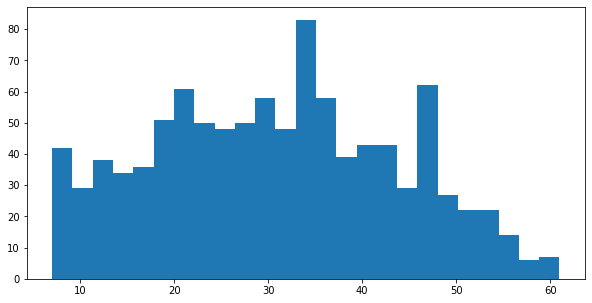

In [120]:
# Plot a histogram of the path lengths
plt.figure(figsize=(10, 5))
x = plt.hist(lengths, bins=25)

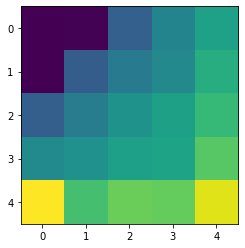

In [256]:
# Display the "average path", the mean of all those simulated
plt.imshow(np.average(np.stack(walks), axis=0))